<a href="https://colab.research.google.com/github/kimdesok/FinanceDataReader/blob/master/MarketIndexTrends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install finance-dataReader==0.5.0

  Using cached finance_datareader-0.5.0-py3-none-any.whl (7.0 kB)
  Attempting uninstall: finance-dataReader
    Found existing installation: finance-datareader 0.8.0
    Uninstalling finance-datareader-0.8.0:
      Successfully uninstalled finance-datareader-0.8.0


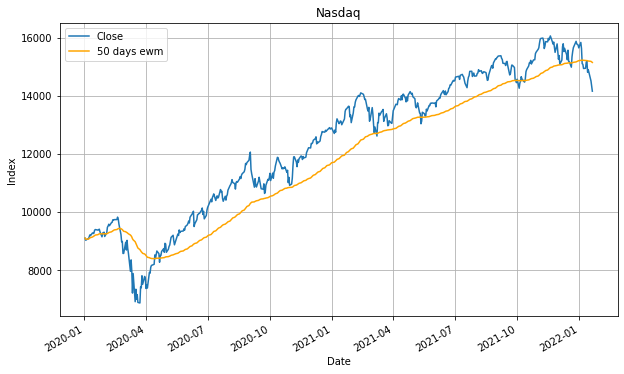

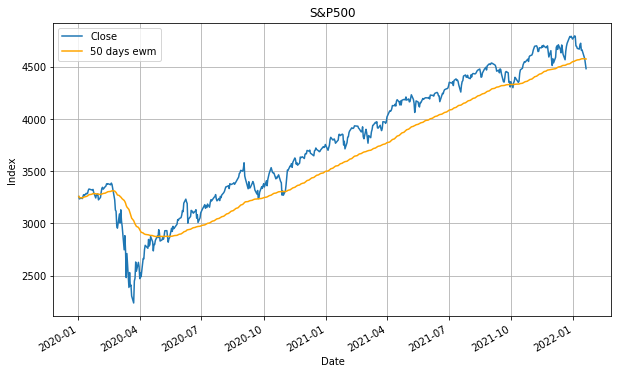

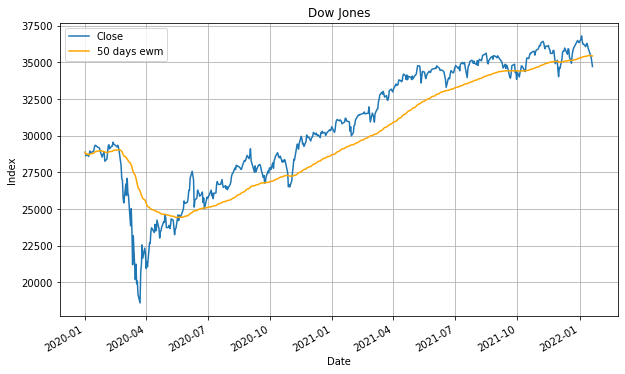

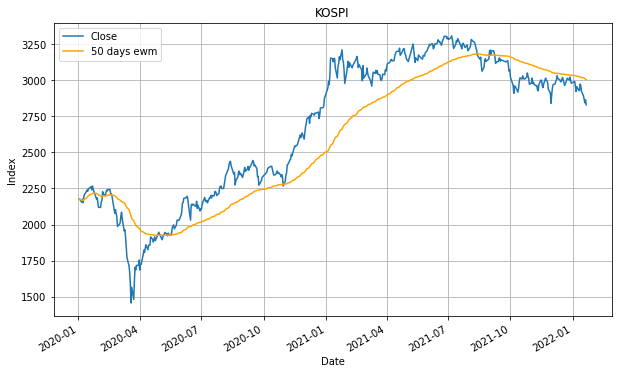

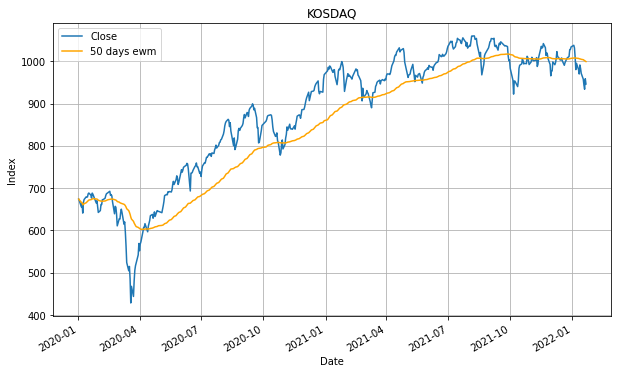

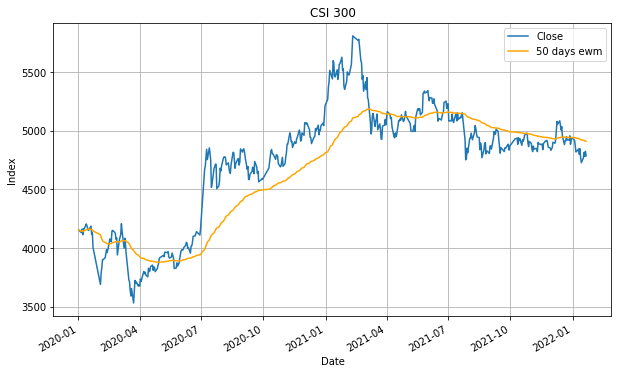

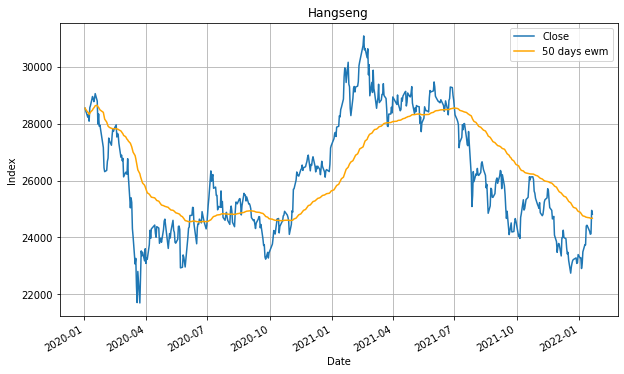

In [18]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

market_list = {'Nasdaq':'IXIC','S&P500':'US500', 'Dow Jones':'DJI', 'KOSPI':'KS11', 'KOSDAQ':'KQ11', 'CSI 300': 'CSI300', 'Hangseng':'HSI'	}

for index in market_list :
  df = fdr.DataReader(market_list[index], start='2020', data_source='fred')
  #df.info()

  plt.figure(figsize=(10, 6))
  h0 = df['Close'].plot()
  Roll_Exponentional_Mean = df['Close'].ewm(50, min_periods=1).mean()
  h1 = Roll_Exponentional_Mean.plot(color='orange', label='50 days ewm')
  plt.ylabel('Index')
  plt.title(index)
  plt.legend()
  plt.grid(True)
  plt.show()


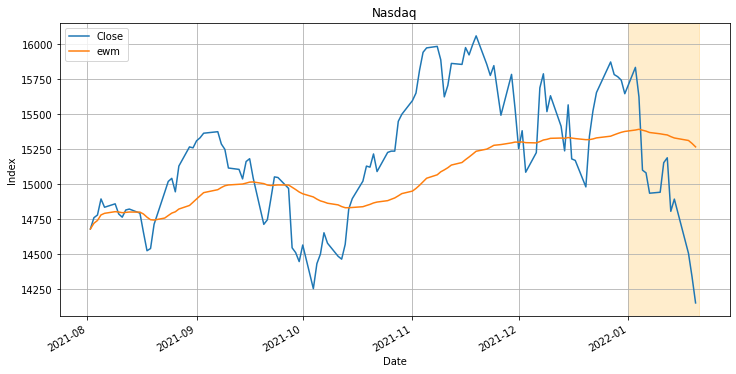

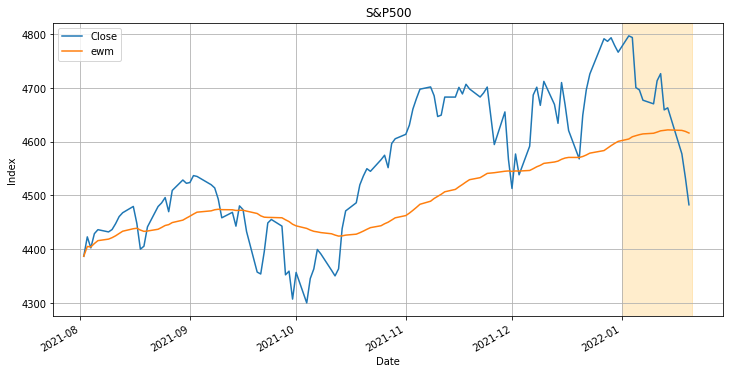

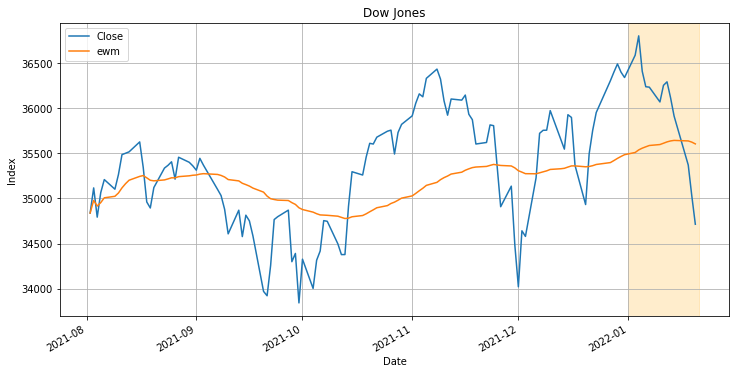

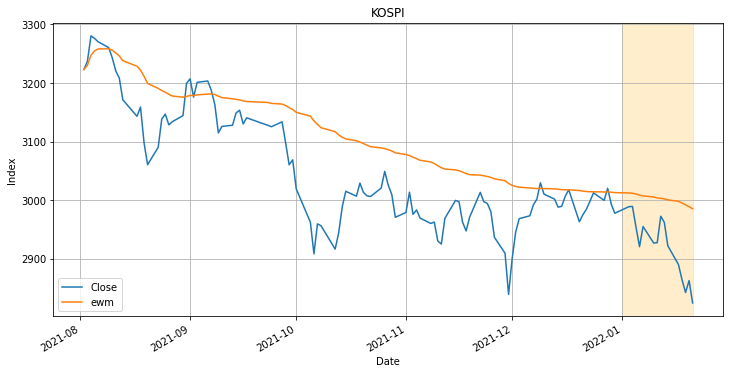

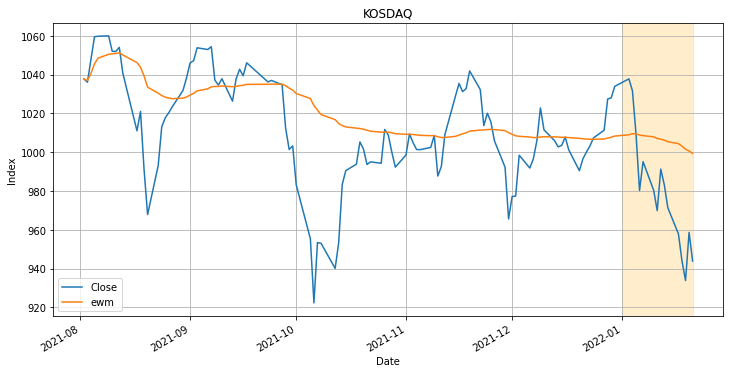

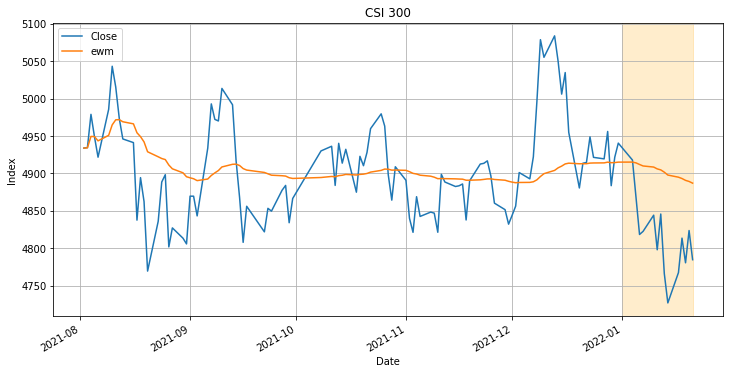

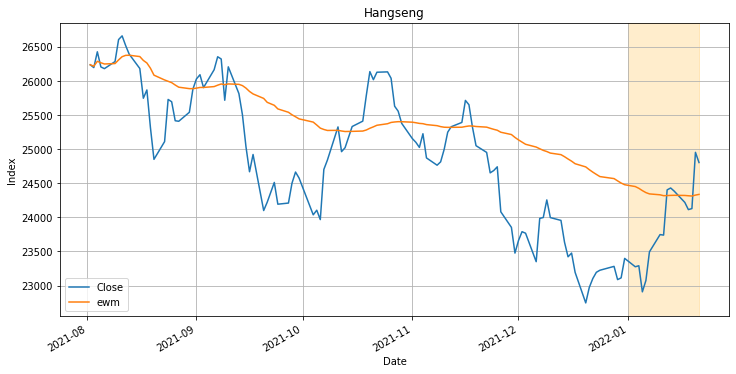

In [27]:
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

for index in market_list :
  df = fdr.DataReader(market_list[index], start='2021-08-01', data_source='fred')
  df['ewm'] = df['Close'].ewm(50, min_periods=1).mean()
  #plt.figure(figsize=(10, 6))
  df = df[['Close','ewm']]
  ax = df.plot()
  ax = ax.axvspan('2022-01-01', '2022-01-21', color='orange', alpha=0.2)
  
  plt.ylabel('Index')
  plt.title(index)
  plt.legend()
  plt.grid(True)
  plt.show()